In [36]:
import numpy as np
import pandas as pd
import re


In [2]:
missing_values = ["n/a", "na", "--", 'NA']
intervals = pd.read_json('data/intervals_challenge.json', lines=True)


In [3]:
intervals.head()

,duration,distance,started_at,trip_id,vehicle_id,city_id,type
0,857,5384,2016-10-03 13:00:00.286999941,c00cee6963e0dc66e50e271239426914,52d38cf1a3240d5cbdcf730f2d9a47d6,pentos,driving_to_destination
1,245,1248,2016-10-03 13:00:00.852999926,427425e1f4318ca2461168bdd6e4fcbd,8336b28f24c3e7a1e3d582073b164895,volantis,going_to_pickup
2,1249,5847,2016-10-03 13:00:01.670000076,757867f6d7c00ef92a65bfaa3895943f,8885c59374cc539163e83f01ed59fd16,pentos,driving_to_destination
3,471,2585,2016-10-03 13:00:01.841000080,d09d1301d361f7359d0d936557d10f89,81b63920454f70b6755a494e3b28b3a7,bravos,going_to_pickup
4,182,743,2016-10-03 13:00:01.970000029,00f20a701f0ec2519353ef3ffaf75068,b73030977cbad61c9db55418909864fa,pentos,going_to_pickup


## Data Cleaning
I'm assigning each type of distance according to the start of the trip id

In [4]:
# Using regular expressions to assign distance_type column values according to the starting digits of the trip_id
intervals['distance_type'] = np.where(intervals.trip_id.str.match('(^[0-8])'), "road", "linear")

In [5]:
intervals.head()

,duration,distance,started_at,trip_id,vehicle_id,city_id,type,distance_type
0,857,5384,2016-10-03 13:00:00.286999941,c00cee6963e0dc66e50e271239426914,52d38cf1a3240d5cbdcf730f2d9a47d6,pentos,driving_to_destination,linear
1,245,1248,2016-10-03 13:00:00.852999926,427425e1f4318ca2461168bdd6e4fcbd,8336b28f24c3e7a1e3d582073b164895,volantis,going_to_pickup,road
2,1249,5847,2016-10-03 13:00:01.670000076,757867f6d7c00ef92a65bfaa3895943f,8885c59374cc539163e83f01ed59fd16,pentos,driving_to_destination,road
3,471,2585,2016-10-03 13:00:01.841000080,d09d1301d361f7359d0d936557d10f89,81b63920454f70b6755a494e3b28b3a7,bravos,going_to_pickup,linear
4,182,743,2016-10-03 13:00:01.970000029,00f20a701f0ec2519353ef3ffaf75068,b73030977cbad61c9db55418909864fa,pentos,going_to_pickup,road


Looking for missing values 

In [6]:
intervals.isna().any().any()

False

In [7]:
#Checking for missing values
intervals.isna().sum()

duration         0
distance         0
started_at       0
trip_id          0
vehicle_id       0
city_id          0
type             0
distance_type    0
dtype: int64

In [8]:
intervals.loc[:, intervals.isnull().any()].columns

Index([], dtype='object')

In [9]:
#Checking data types
intervals.dtypes

duration                 object
distance                 object
started_at       datetime64[ns]
trip_id                  object
vehicle_id               object
city_id                  object
type                     object
distance_type            object
dtype: object

In [10]:
intervals[["duration", "distance"]] = intervals[["duration", "distance"]].apply(pd.to_numeric)

ValueError: Unable to parse string "NA" at position 131832

In [ ]:
# Now converting distance and duration to numeric
intervals[["duration", "distance"]] = intervals[["duration", "distance"]].apply(pd.to_numeric)

In [11]:
intervals.loc[intervals['distance'] == 'NA']

,duration,distance,started_at,trip_id,vehicle_id,city_id,type,distance_type
131832,NA,NA,2016-10-04 16:16:57.677000046,e1a5305515f04de1a32a883e752f5da4,9eceeaf8c8ad105212d6e8eecda02c4a,pentos,driving_to_destination,linear
133409,NA,NA,2016-10-04 16:28:50.309999943,13f154ab0c7d17fb2ec203a3a714d6b0,fce3a43cd5f5a43e2d0b929ad604d3b6,pentos,going_to_pickup,road
138211,NA,NA,2016-10-04 17:04:50.207000017,99dc4314729ae959762a9bc2ba681de6,b041d487fdc4afcbdc9d3ce23bfbe59a,pentos,going_to_pickup,linear
153973,NA,NA,2016-10-04 19:11:57.548000097,4edd2ed1f5c5401d117b87d70d694f8b,909d1f5607f5796963b0142f8536ccad,pentos,driving_to_destination,road
155979,NA,NA,2016-10-04 19:27:43.782999992,179ec5f2abe307b008d8f5d4b33d29b4,bef0644f66f06d5aa5f547c58845d8b7,pentos,driving_to_destination,road
...,...,...,...,...,...,...,...,...
165165,NA,NA,2016-10-04 20:36:10.846999884,d2f81b419daddb90bd701ab9870f47a3,05e4532a59b7bfe65894335d1bc83e4d,volantis,driving_to_destination,linear
165166,NA,NA,2016-10-04 20:36:12.719000101,73a07d4504036997306e0e3330529294,bed6dd187f23b3e8d956bb0d1ab0524a,volantis,waiting_for_rider,road
165167,NA,NA,2016-10-04 20:36:14.763000011,d98c047d565bd488b17e08594965c479,31cd2f19d27c0c0c0ca386de72866a81,bravos,driving_to_destination,linear
165168,NA,NA,2016-10-04 20:36:15.957999945,ce9a7ae5f76667c9f92b149a1b345a2d,4a555013634506246eed5d801ffbe526,volantis,driving_to_destination,linear


In [12]:
print(f'The proportion of missing distance a duration values is {1157/165170} as it is a very small proportion we could drop them')

The proportion of missing distance a duration values is 0.007004904038263607 as it is a very small proportion we could drop them


## Should the company move towards road distance? What's the max price it would make sense to pay per query? (make all the assumptions you need, and make them explicit)

In [13]:
intervals['distance_type'].value_counts()

road      93652
linear    71518
Name: distance_type, dtype: int64

In [17]:
print(f'There are {93652 - 71518} more road trips than linear trips distances in the data')
print(f'The linear trips are {71518/(71518+93652)} of the data while the road trips are {93652/(71518+93652)}')

There are 22134 more road trips than linear trips distances in the data
The linear trips are 0.4329963068353817 of the data while the road trips are 0.5670036931646183


I'm assuming that linear distance trips are using the static GoogleMaps API, priced as the image below:
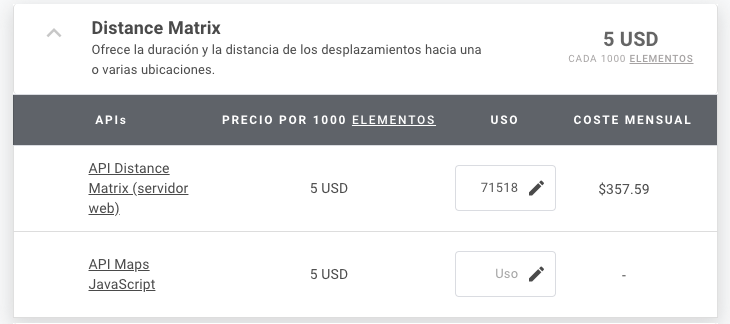
Which as you see would give us a cost of $357.59 dollars monthly. I'm assuming the app doesn't uses the Google Maps JavaScript API and it only uses the Distance Matrix server.

While for the road distance trips we would have a price of: $936.52 dollars monthly
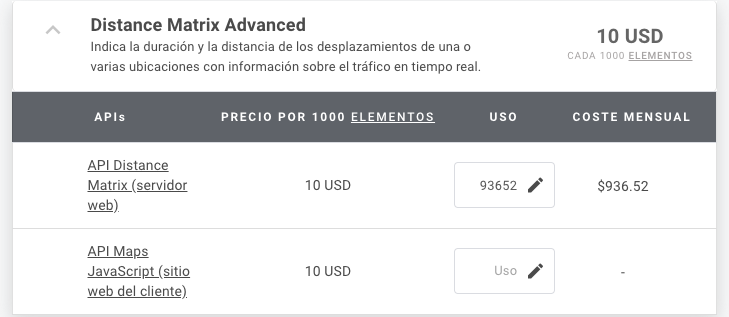

So I'm calculating price variance by the formula:

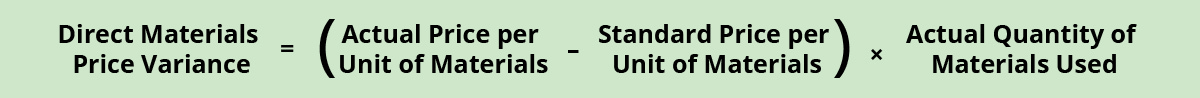

## Step 1: Calculate Actual Cost

Actual Cost = Actual Quantity x Actual Price

#### Assuming the cost for the total API calls
Using the Real Time Traffic Distance Matrix we would have a cost of 1651.7 dollars monthly

In [26]:
actual_cost = (10 * (71518+93652))/1000
print(actual_cost)

1651.7


## Step 2: Calculating standard price

Standard Cost = Actual Quantity x Standard Price

In [28]:
standard_cost = (5* (71518+93652))/1000
print(standard_cost)

825.85


## Step 3: Price variance
Price Variance = Actual Cost - Standard Cost

In [29]:
price_variance = actual_cost - standard_cost
print(price_variance)

825.85


# Conclusion

### Should the company move towards road distance? What's the max price it would make sense to pay per query? (make all the assumptions you need, and make them explicit)

We see how the cost would duplicate (makes sense as the price for the road traffic matrix is exactly double of the regular one). 

It doesn't seem like an excessive price to pay for something that I think improves the product a lot for end users. (I would do A/B tests as well nevertheless) 

### How would you improve the experimental design? Would you collect any additional data?


#### Improving costs
Assuming the funnel is: waiting_for_rider >> going_to_pickup >> driving_to_destination

I would run a different A/B test by identifying the rides that don't complete the funnel. To do that I would program for the "waiting for riders" calls to be with the linear distance call and the other two to do it with the road distance call. 

Then I would compare costs and conversions.


#### Optimizing API calls
I would do only one road distance call per trip_id. Of course I would bounce this off with the engineering team as I don't know if. 

Also Google provides a 20% discount if we use more than 100K calls monthly. Assuming that it is completely necessary to perform the API calls at these three points of the funnel I would go for this discount.

